# Pulse Width Increase

The end effect of multiple spikes can be obtained by increasing the spike width. The simplest way to increase is to multiply the pulse width with the number of incoming spikes. However, if the spike rate is high, the pulse width can surpass the simulation time step. Therefore, when $dt$ = 1ms and $t_{pulse}$ = 10 $\mu$,  100 spikes is the upper limit for linear increase. 

On the other side, the amount of increase can be decreased at each step exponentially and a logarithmic increase function can be obtained. In this way, upper limit for the number of spikes can be omitted. Hereby this test aims to compare and understand the effect of using two different approach.

In the table below, the notation used in equations is explained. 

| Term           | Comment                                                 |
| -------------- | ------------------------------------------------------- |
| $$t_{pulse}$$  | pulse width in seconds                                  |
| $$n_{spikes}$$ | number of spikes arrived within the simulation timestep |
| $$dt$$         | simulation timestep                                     |

Using the notation above, the linear and logarithmic increase functions are defined as follows. 

| Method               | Formula                                                                                                          |
| -------------------- | ---------------------------------------------------------------------------------------------------------------- |
| Linear Increase      | $$\overline{t_{pulse}} = n_{spikes} \cdot t_{pulse}$$                                                            |
| Logarithmic Increase | $$\overline{t_{pulse}} = dt \cdot \left( 1 -exp \left( -\dfrac{n_{spikes} \cdot t_{pulse}}{dt} \right) \right)$$ |

Using the above mentioned functions, the pulse with increment given 3 spikes at the same time is expected to be seen as in Figure below.

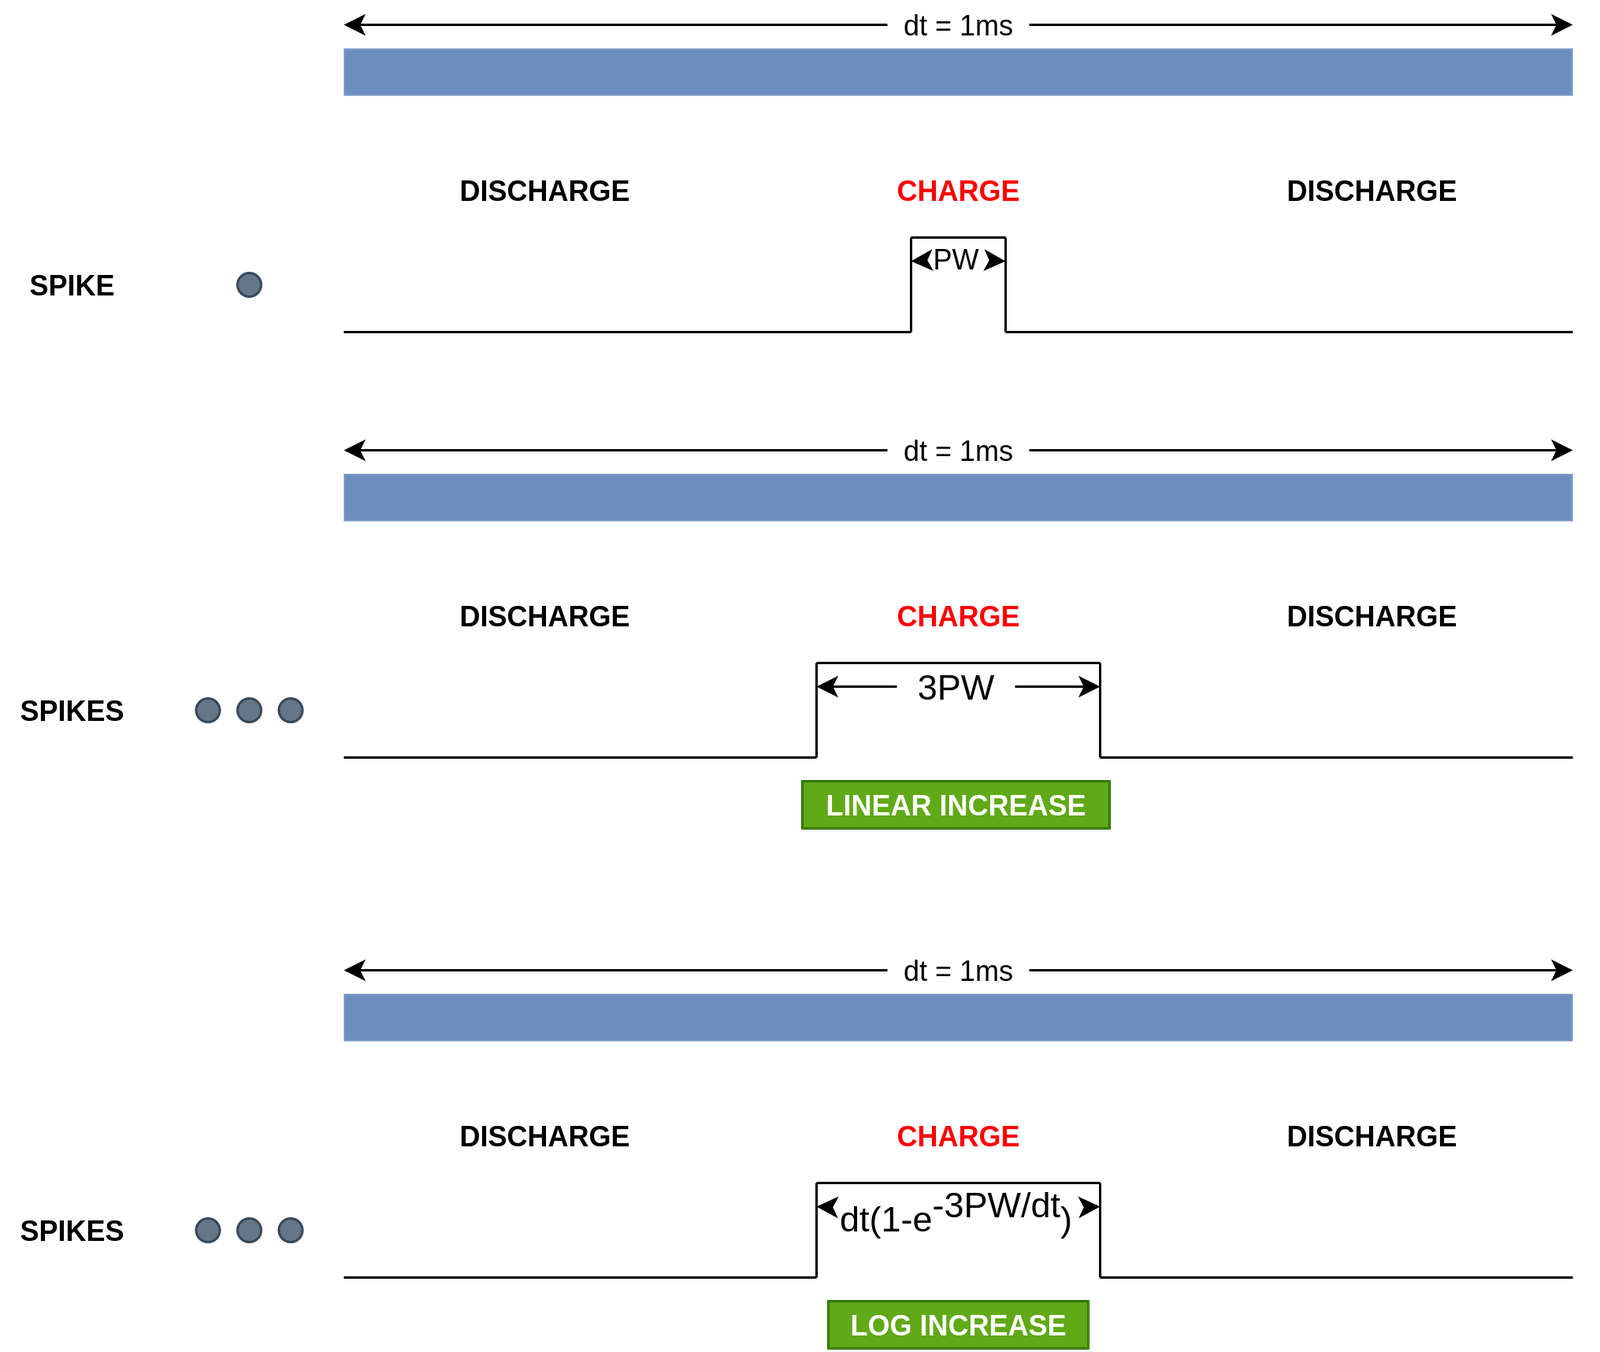

In [12]:
from IPython.display import Image
Image('images/multiple_spikes.png')

In order to observe the difference between the linear and logarithmic increase, two functions are compared given 2, 10, 50, 100, and 1000 spikes. Please note that 1000 spikes /1ms is an unrealistically high number that corresponds to a rate of 1MHz. 

For the sake of comparison, first the functions are plotted with respect to the number of spikes. Then, the resulting pulses are plotted.

In [2]:
import numpy as np
from rockpool.timeseries import TSEvent, TSContinuous

# - Plotting imports and config
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 300

In [3]:
import sys
sys.path.insert(
    0,
    "/home/ugurc/SynSense Dropbox/Ugurcan Cakal/repos/rockpool__dynapse/rockpool/devices/dynapse",
)

from utils import pulse_width_increment, spike_to_pulse

## Function comparison with respect to number of spikes

The utility function below take the functions and shows how they scales with increasing number of spikes.

In [13]:
def compare_increment_functions(linear_incr, log_incr, num_spikes, base_width, dt):

    # Calculate the x and y axis values
    base = np.arange(1, num_spikes + 1, 1)
    lin = linear_incr(base)
    log = log_incr(base)

    # Prepare the annotations
    title = f"Linear vs. Logarithmic Increase (dt={dt:.1e};  $t_{{pulse}}$={base_width:.1e})"
    xaxis = "Number of spikes"
    yaxis = "Time(s)"

    ## Get the absolute and percent difference between max values
    diff = lin[-1] - log[-1]
    percent = (diff / lin[-1]) * 100
    difference = f"$\Delta$ = {diff:.2e} ({percent:.2f}%)"

    # Get a figure
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel(xaxis)
    ax.set_ylabel(yaxis)

    ax.plot(base, lin, label="Linear")
    ax.plot(base, log, label="Log")

    # Draw a dashed line between end points of logarithmic and linear curves
    x_values = [base[-1], base[-1]]
    y_values = [log[-1], lin[-1]]
    ax.plot(x_values, y_values, linestyle="dashed", color="red")

    # Annotate the difference
    xy_arrow = (base[-1], log[-1] * 0.99)  # arrow position
    xy_text = (base[-1] * 0.85, log[-1] * 0.8)  # text position
    arrowprops = dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=90")
    ax.annotate(difference, xy=xy_arrow, xytext=xy_text, arrowprops=arrowprops)

    ax.legend()
    plt.show()

## Pulse Comparison with respect to time

The utility function implemented below helps to visualise the pulses extended using different approaches

In [5]:
def compare_pulses(linear_incr, log_incr, num_spikes, dt):
    pulse_linear = linear_incr(num_spikes)
    pulse_log = log_incr(num_spikes)

    # Linearly Extended Pulse
    event_linear = TSEvent(
        times=[(dt - pulse_linear) / 2],
        t_start=-1e-6,
        t_stop=dt + 1e-6,
        name="Linear event",
    )
    pulse_linear = spike_to_pulse(
        event_linear,
        dt=1e-6,
        pulse_width=pulse_linear,
        amplitude=1,
        name=f"Linear Increase with num_spikes = {num_spikes}",
    )

    # Logarithmic Extended Pulse
    event_log = TSEvent(
        times=[(dt - pulse_log) / 2],
        t_start=-1e-6,
        t_stop=dt + 1e-6,
        name="Linear event",
    )
    pulse_log = spike_to_pulse(
        event_log,
        dt=1e-6,
        pulse_width=pulse_log,
        amplitude=1,
        name=f"Log Increase with num_spikes = {num_spikes}",
    )
    
    #Annotations
    title = "Linear vs. Logarithmic Extended Pulses"
    xaxis = "Time(s)"
    yaxis = "Amplitude(V)"
    
    # Get a figure
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel(xaxis)
    ax.set_ylabel(yaxis)
    
    pulse_linear.plot(target=ax, label="linear")
    pulse_log.plot(target=ax, label="log")
    ax.legend()
    plt.show()

## The experiment

The experiment depends only on one parameter: the number of spikes.
In the cells below, [2,10,50,100,1000] spikes are given in order.

In [6]:
def comparison(num_spikes, base_width=10e-6, dt=1e-3):
    linear_incr = pulse_width_increment("lin", base_width, dt)
    log_incr = pulse_width_increment("log", base_width, dt)
    compare_increment_functions(linear_incr, log_incr, num_spikes, base_width, dt)
    compare_pulses(linear_incr, log_incr, num_spikes, dt)

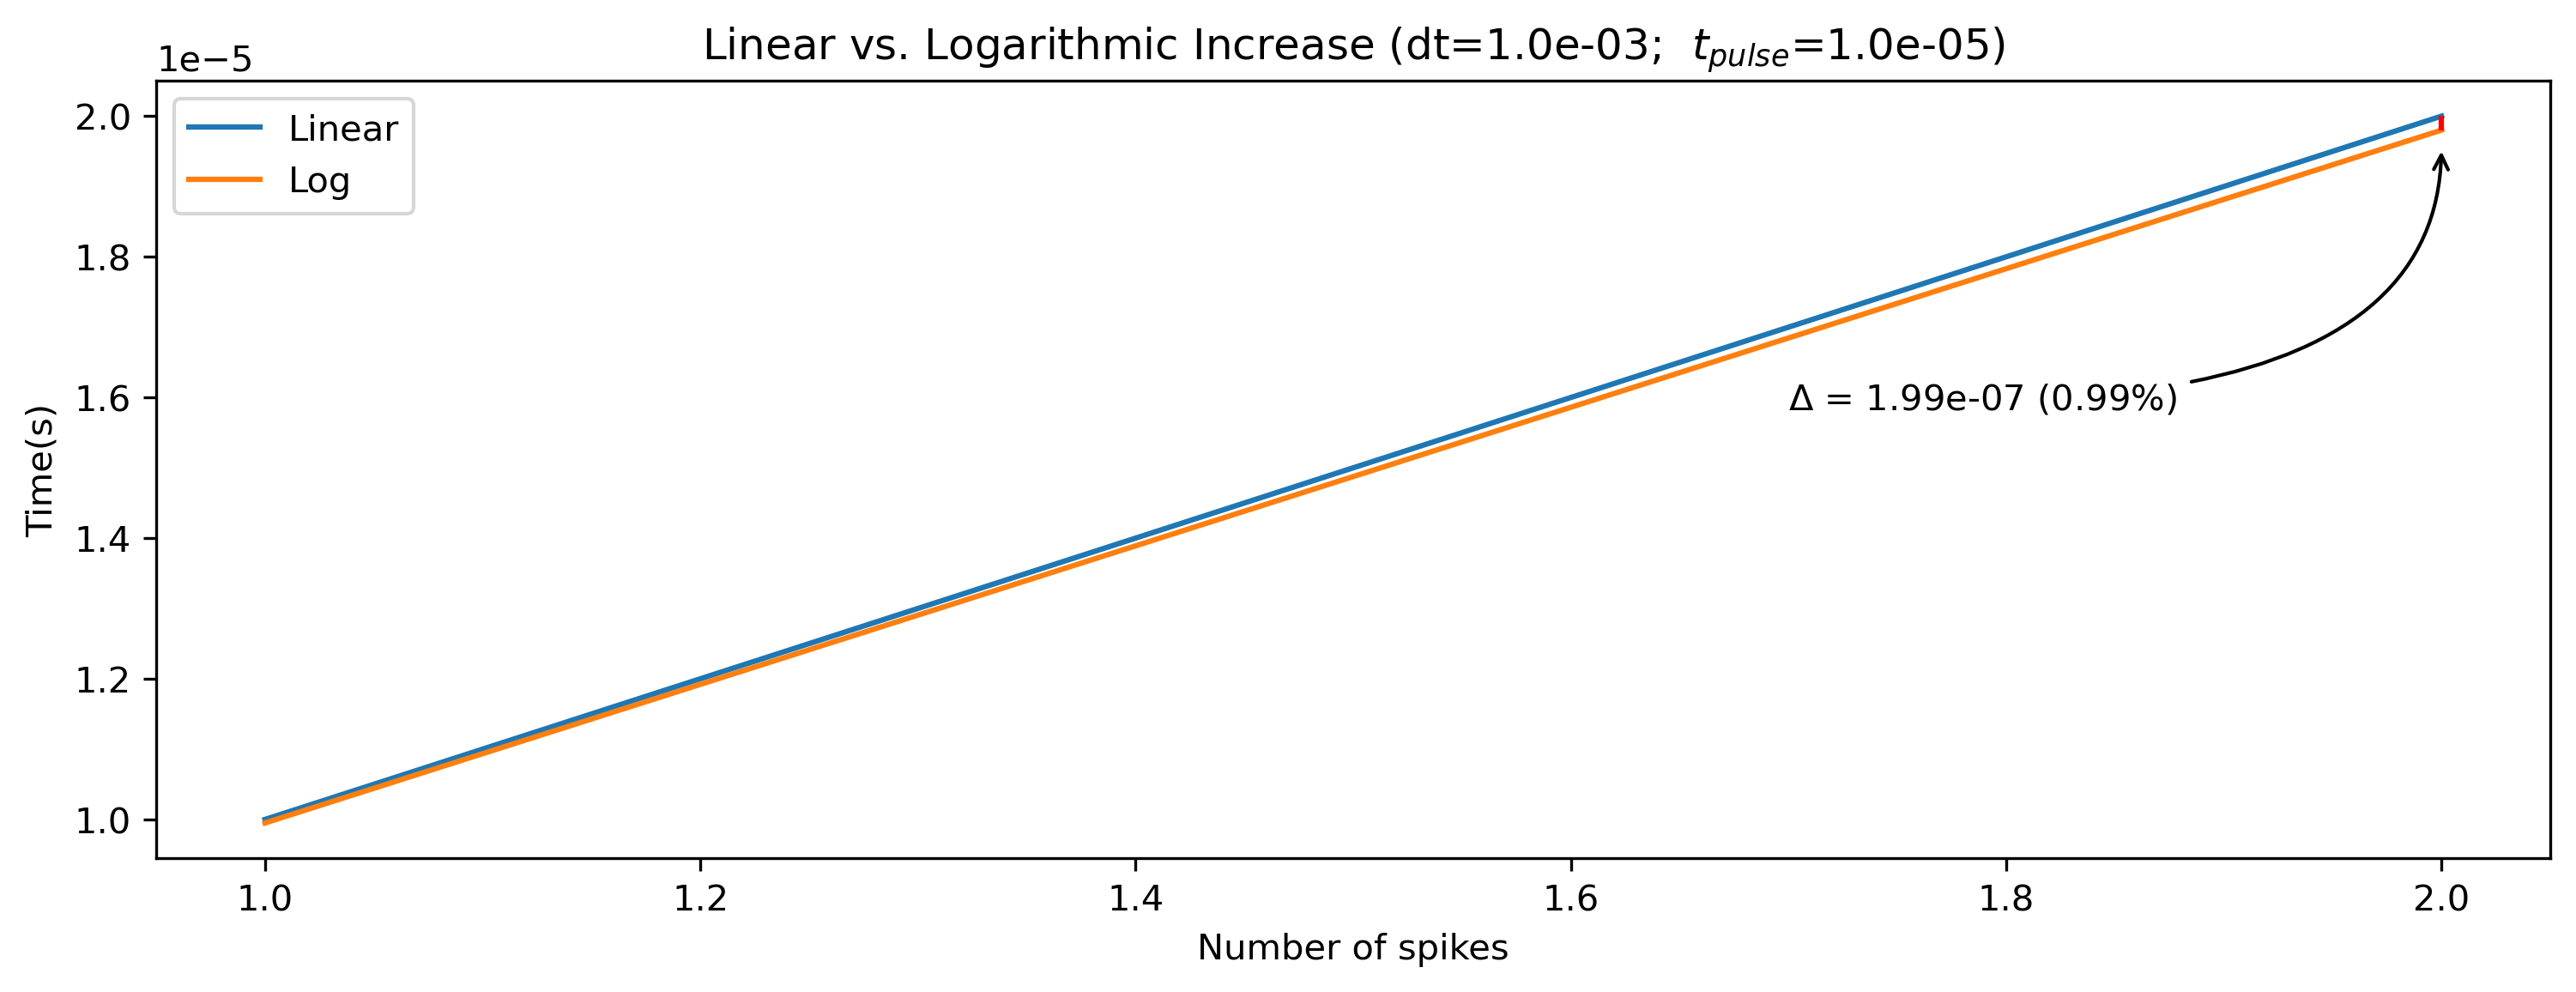

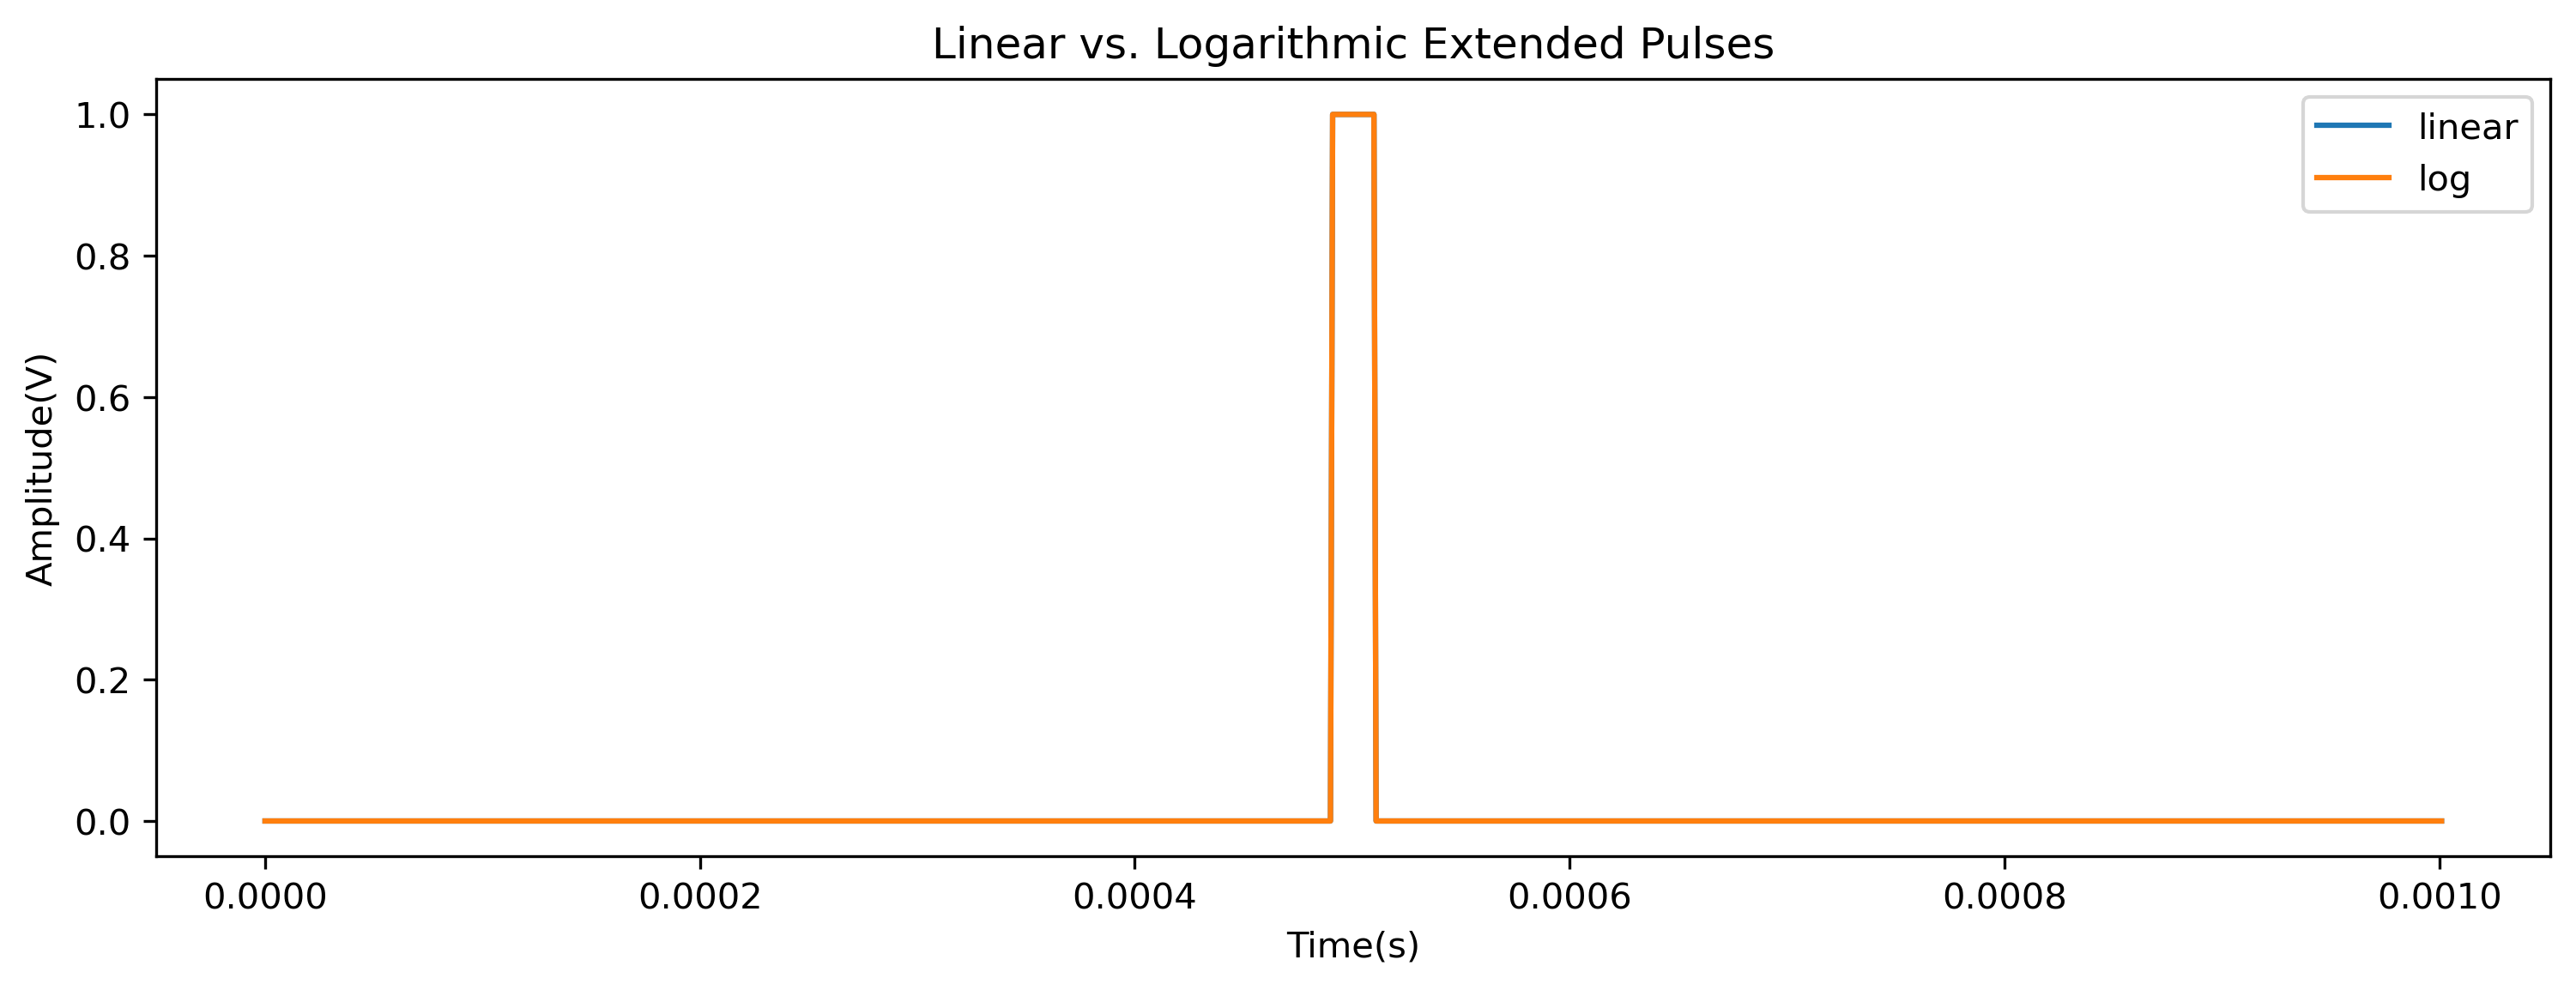

In [7]:
comparison(num_spikes=2)

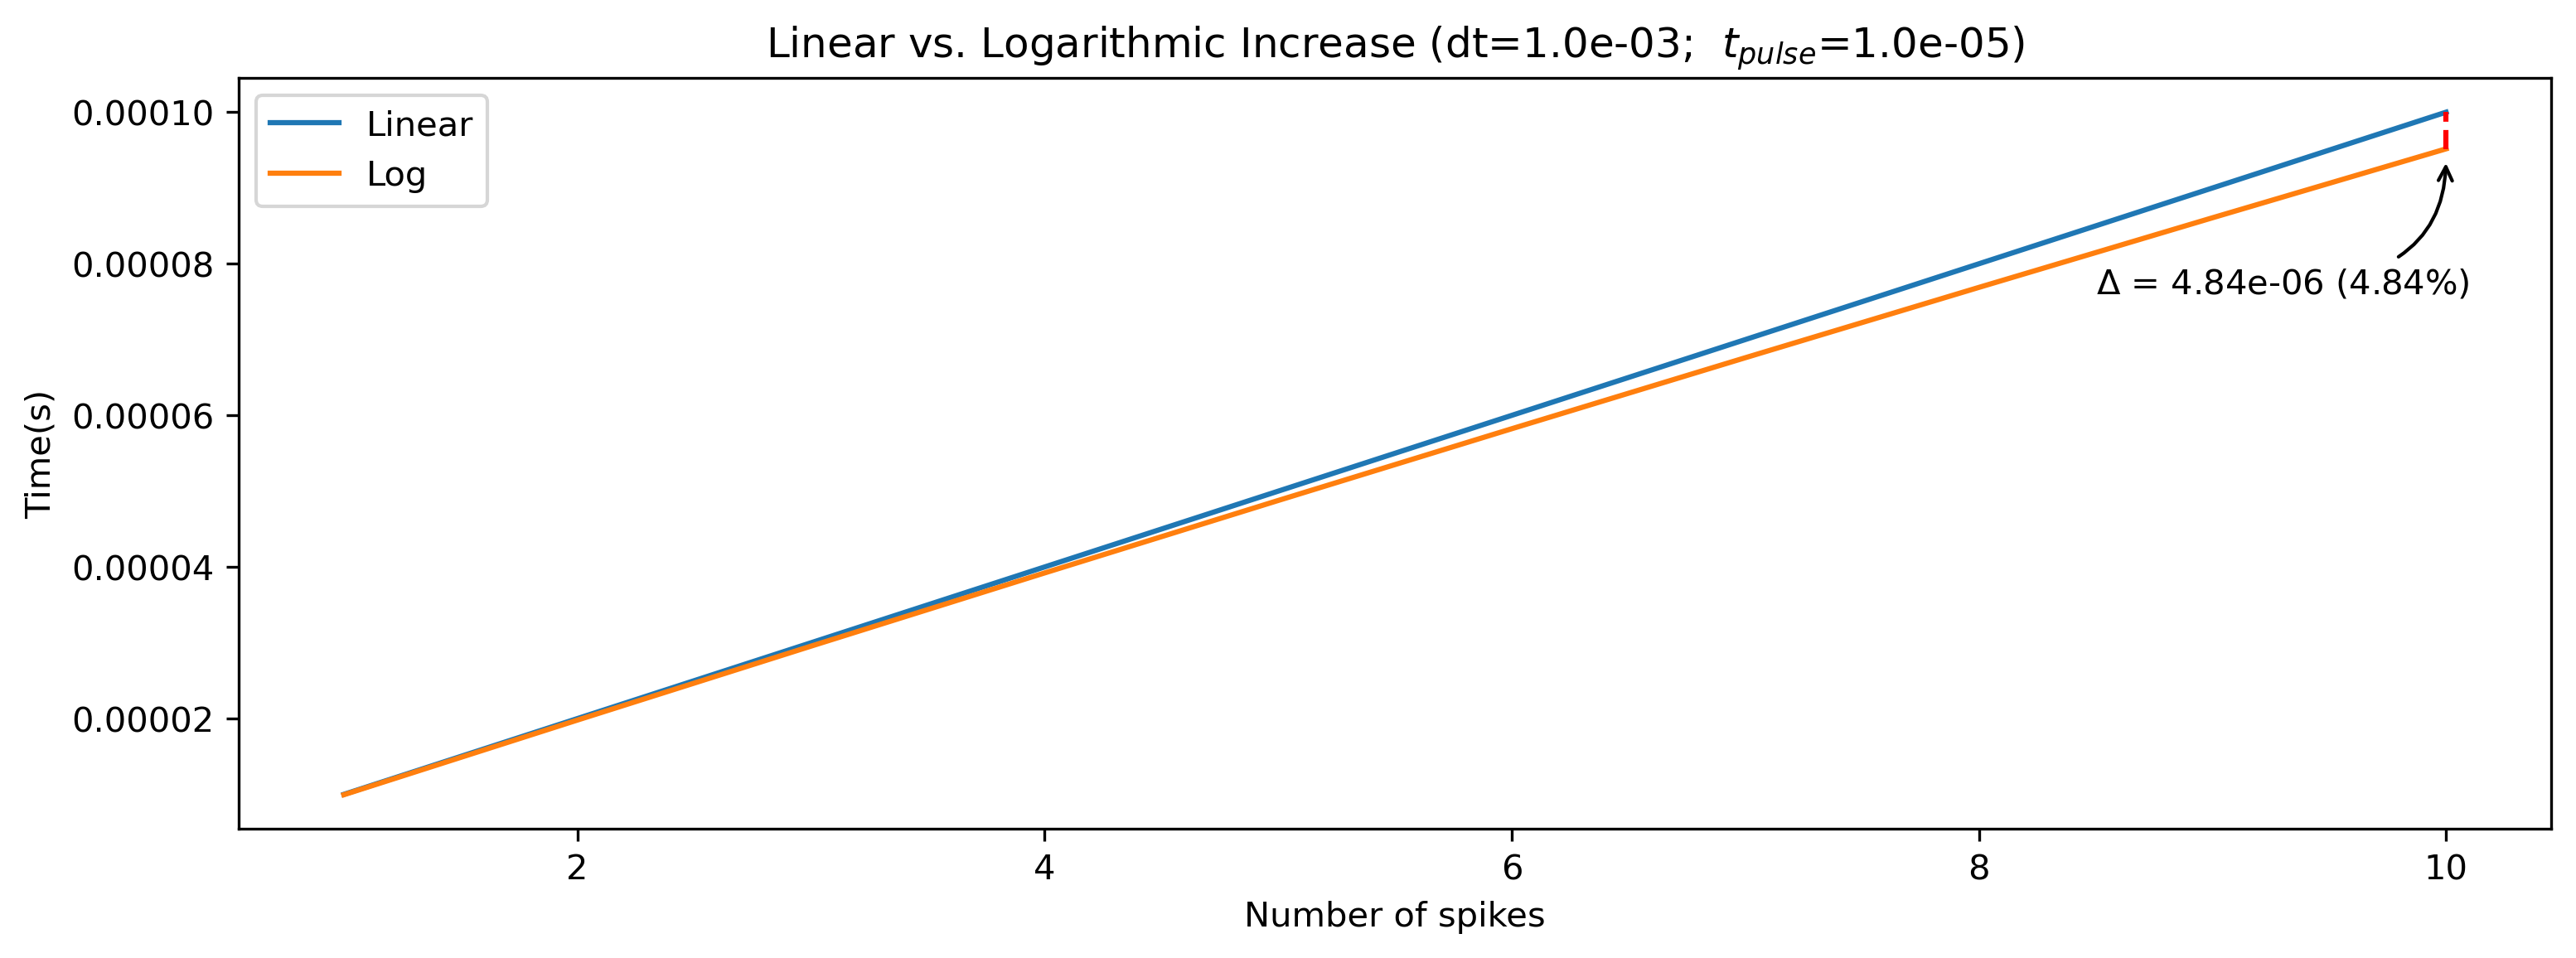

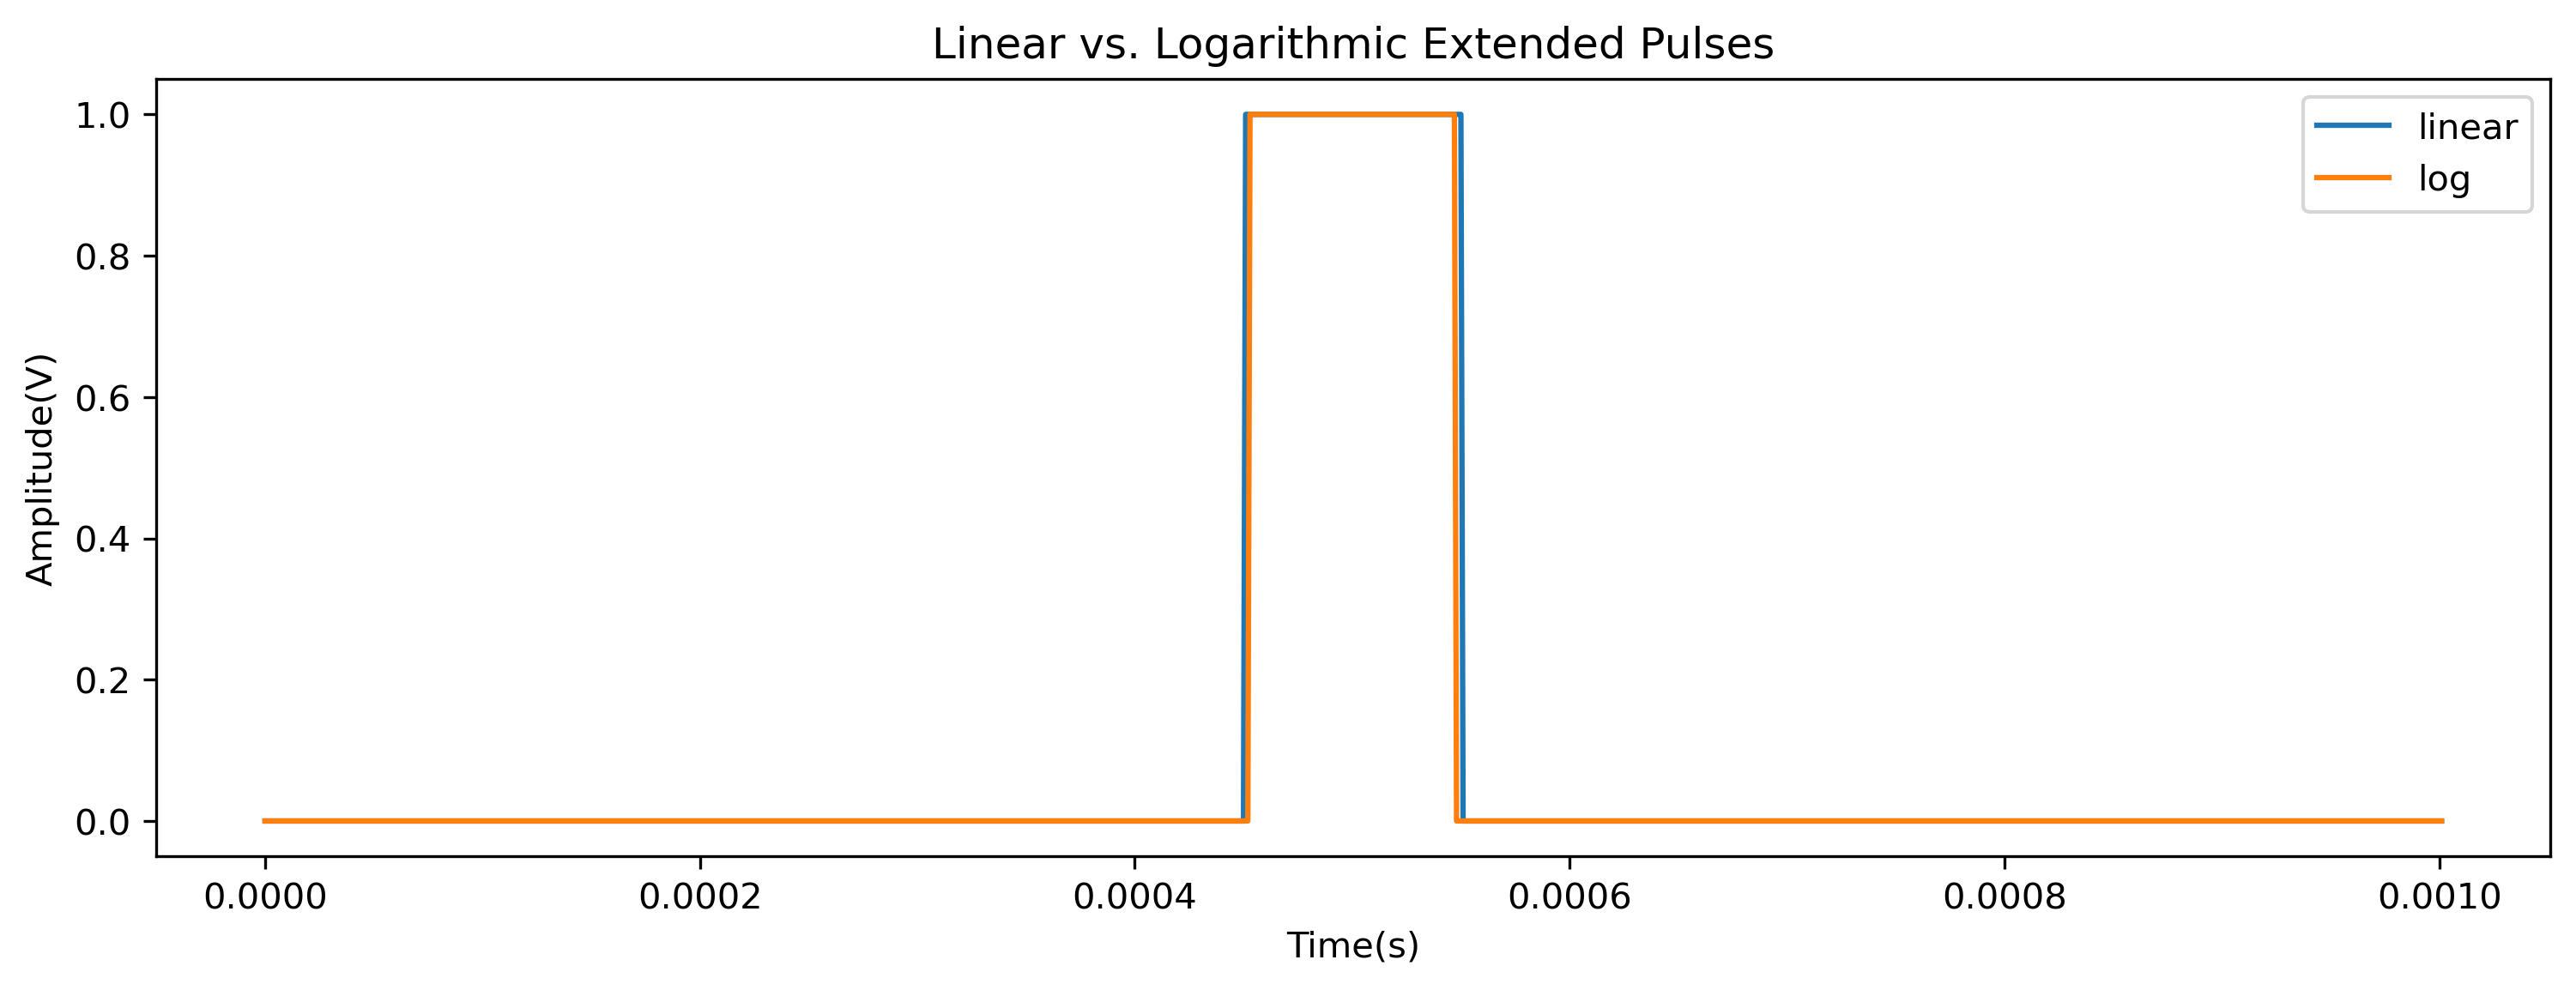

In [8]:
comparison(num_spikes=10)

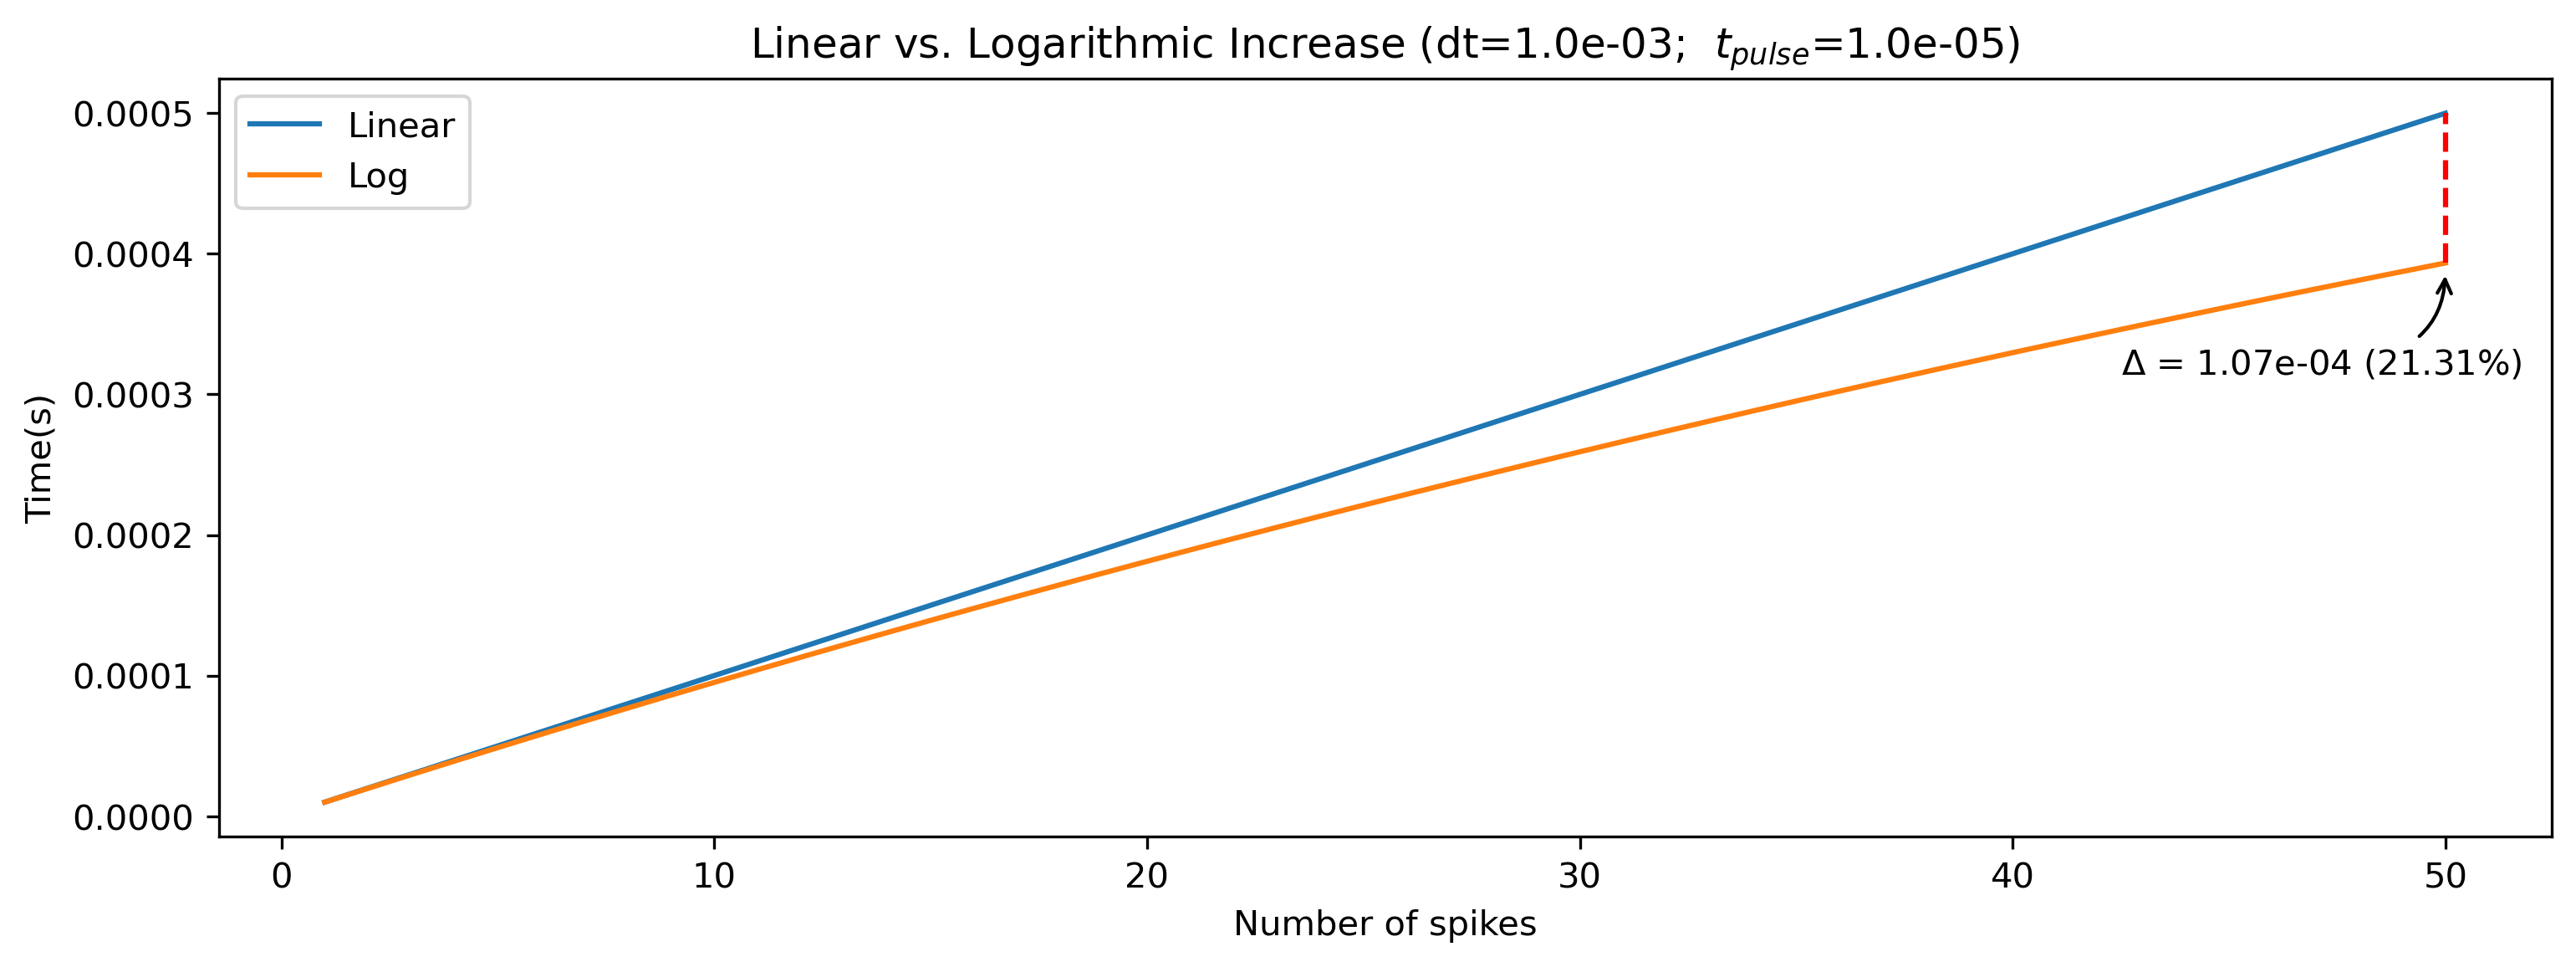

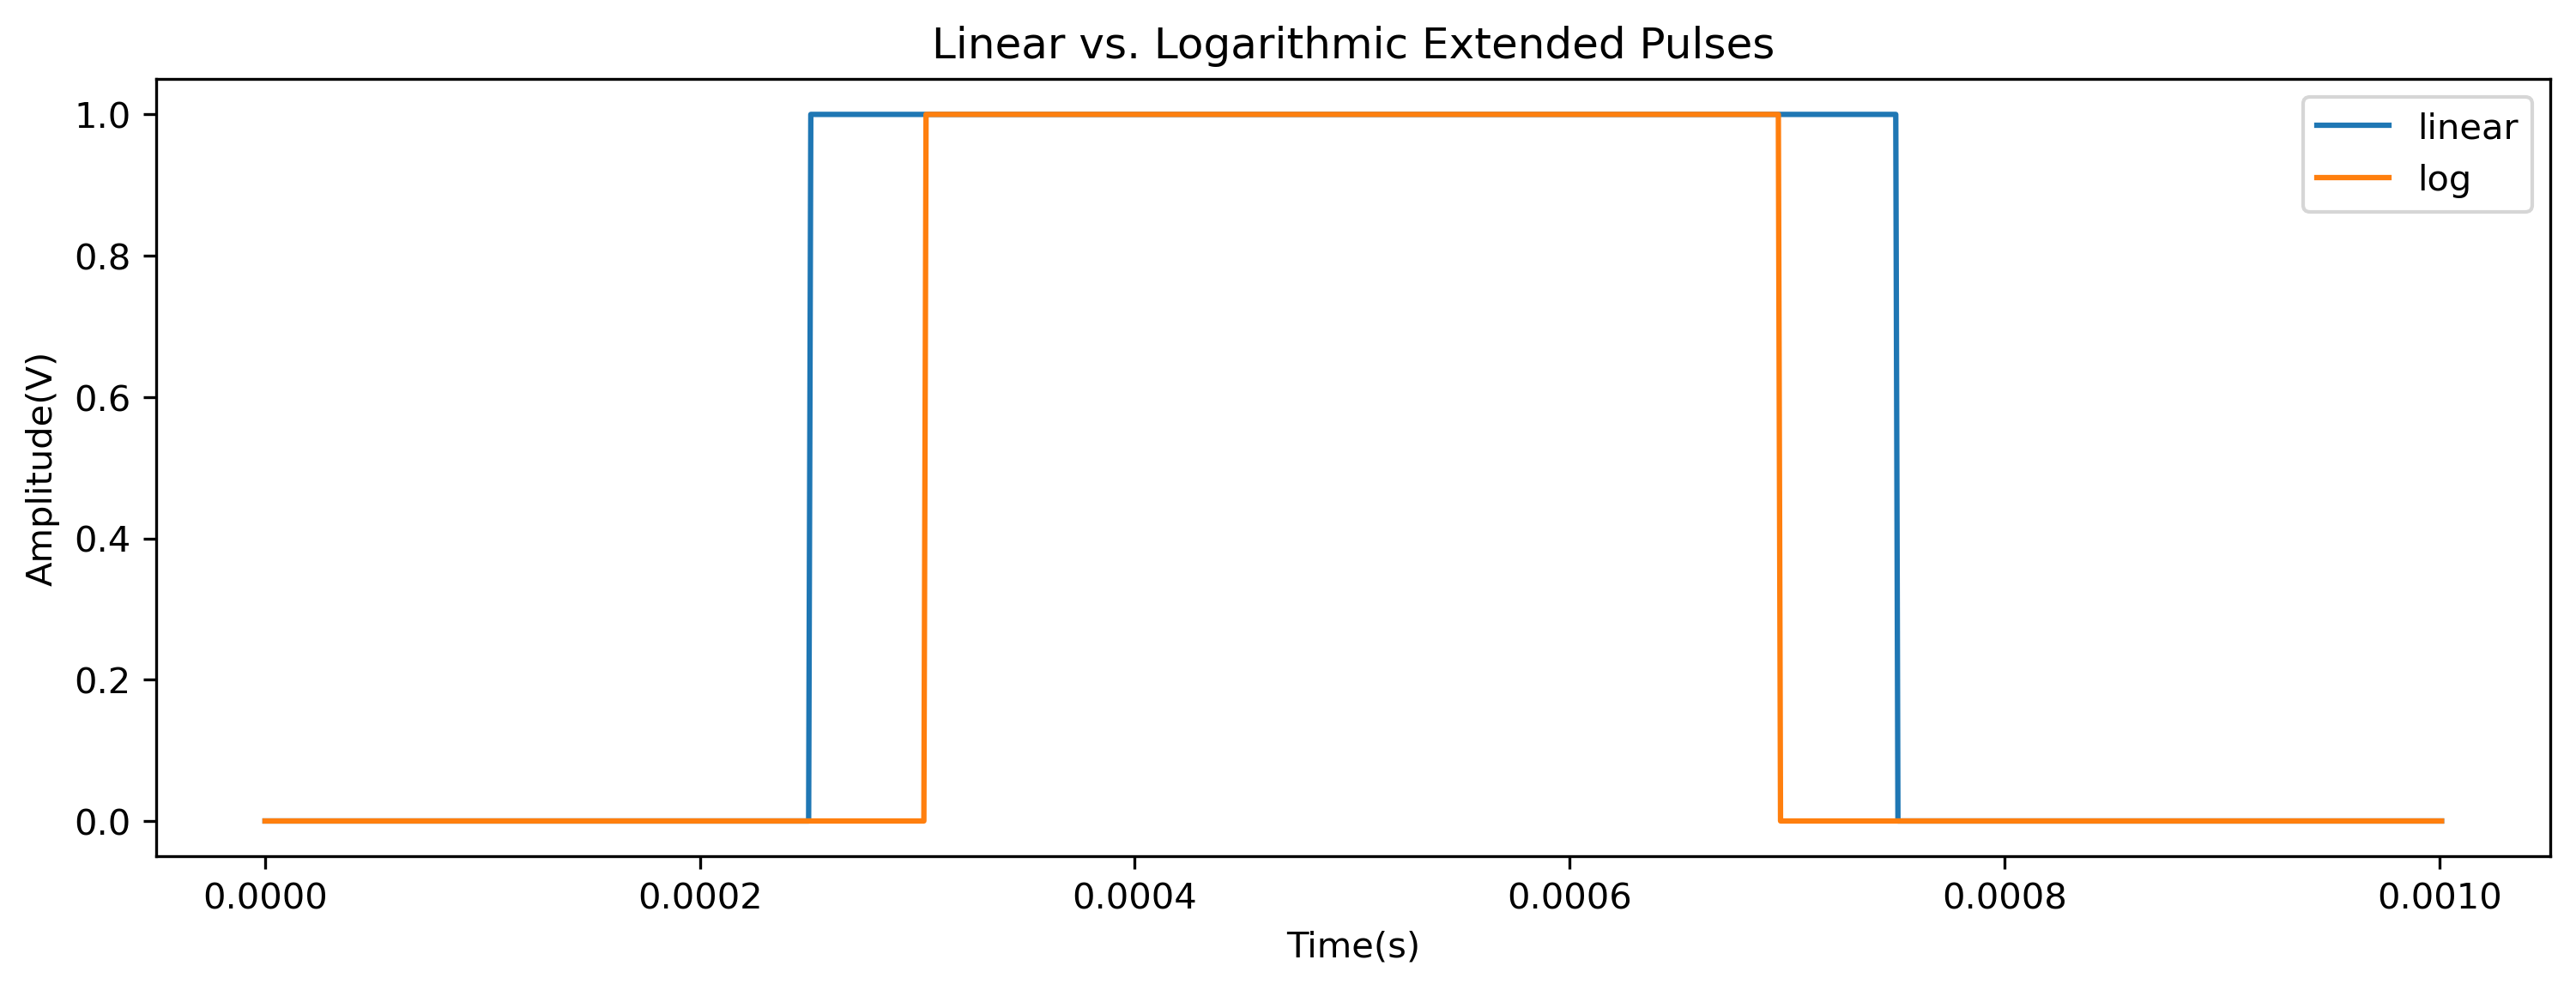

In [9]:
comparison(num_spikes=50)

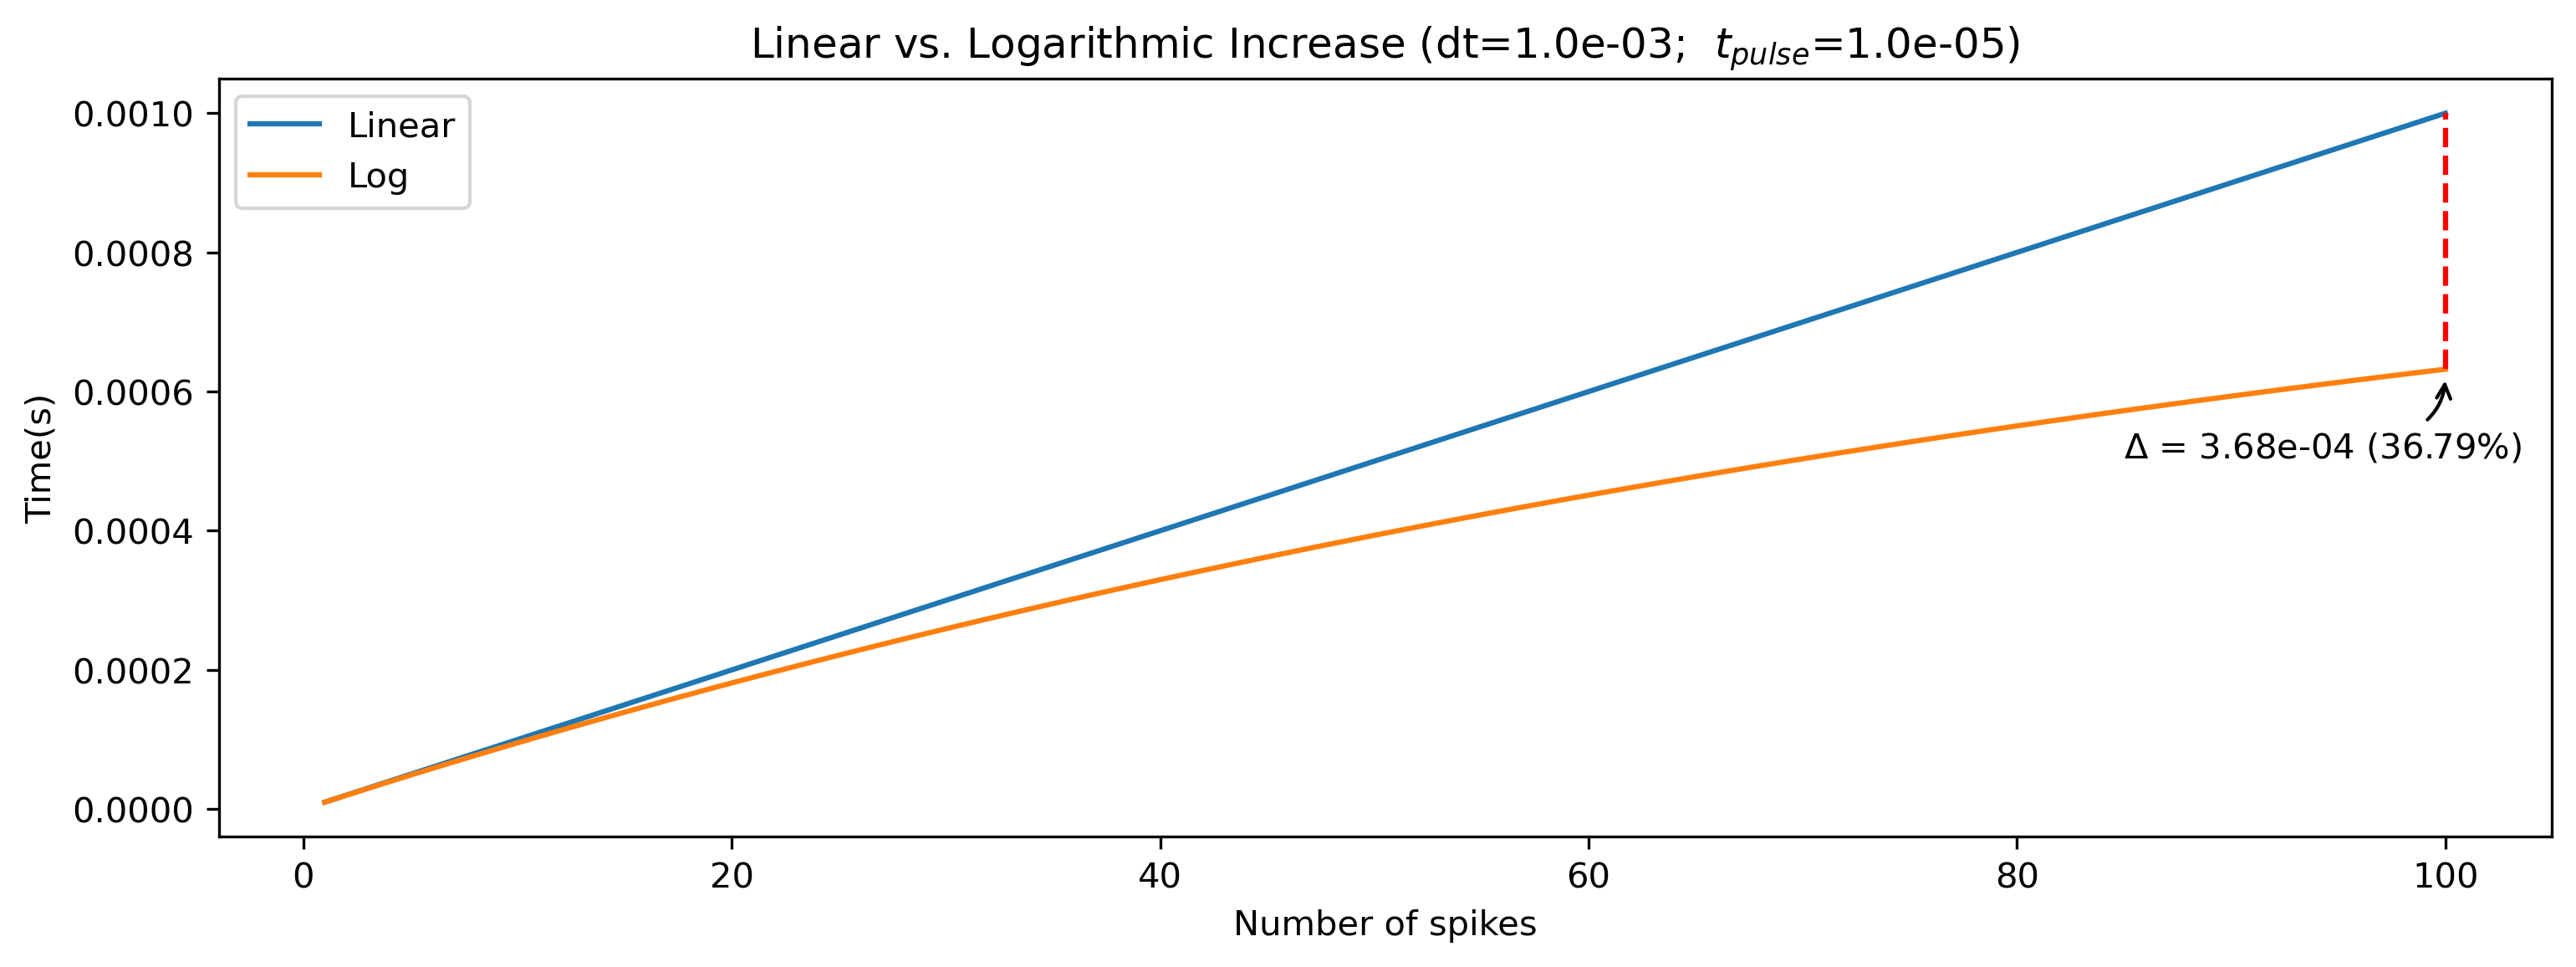

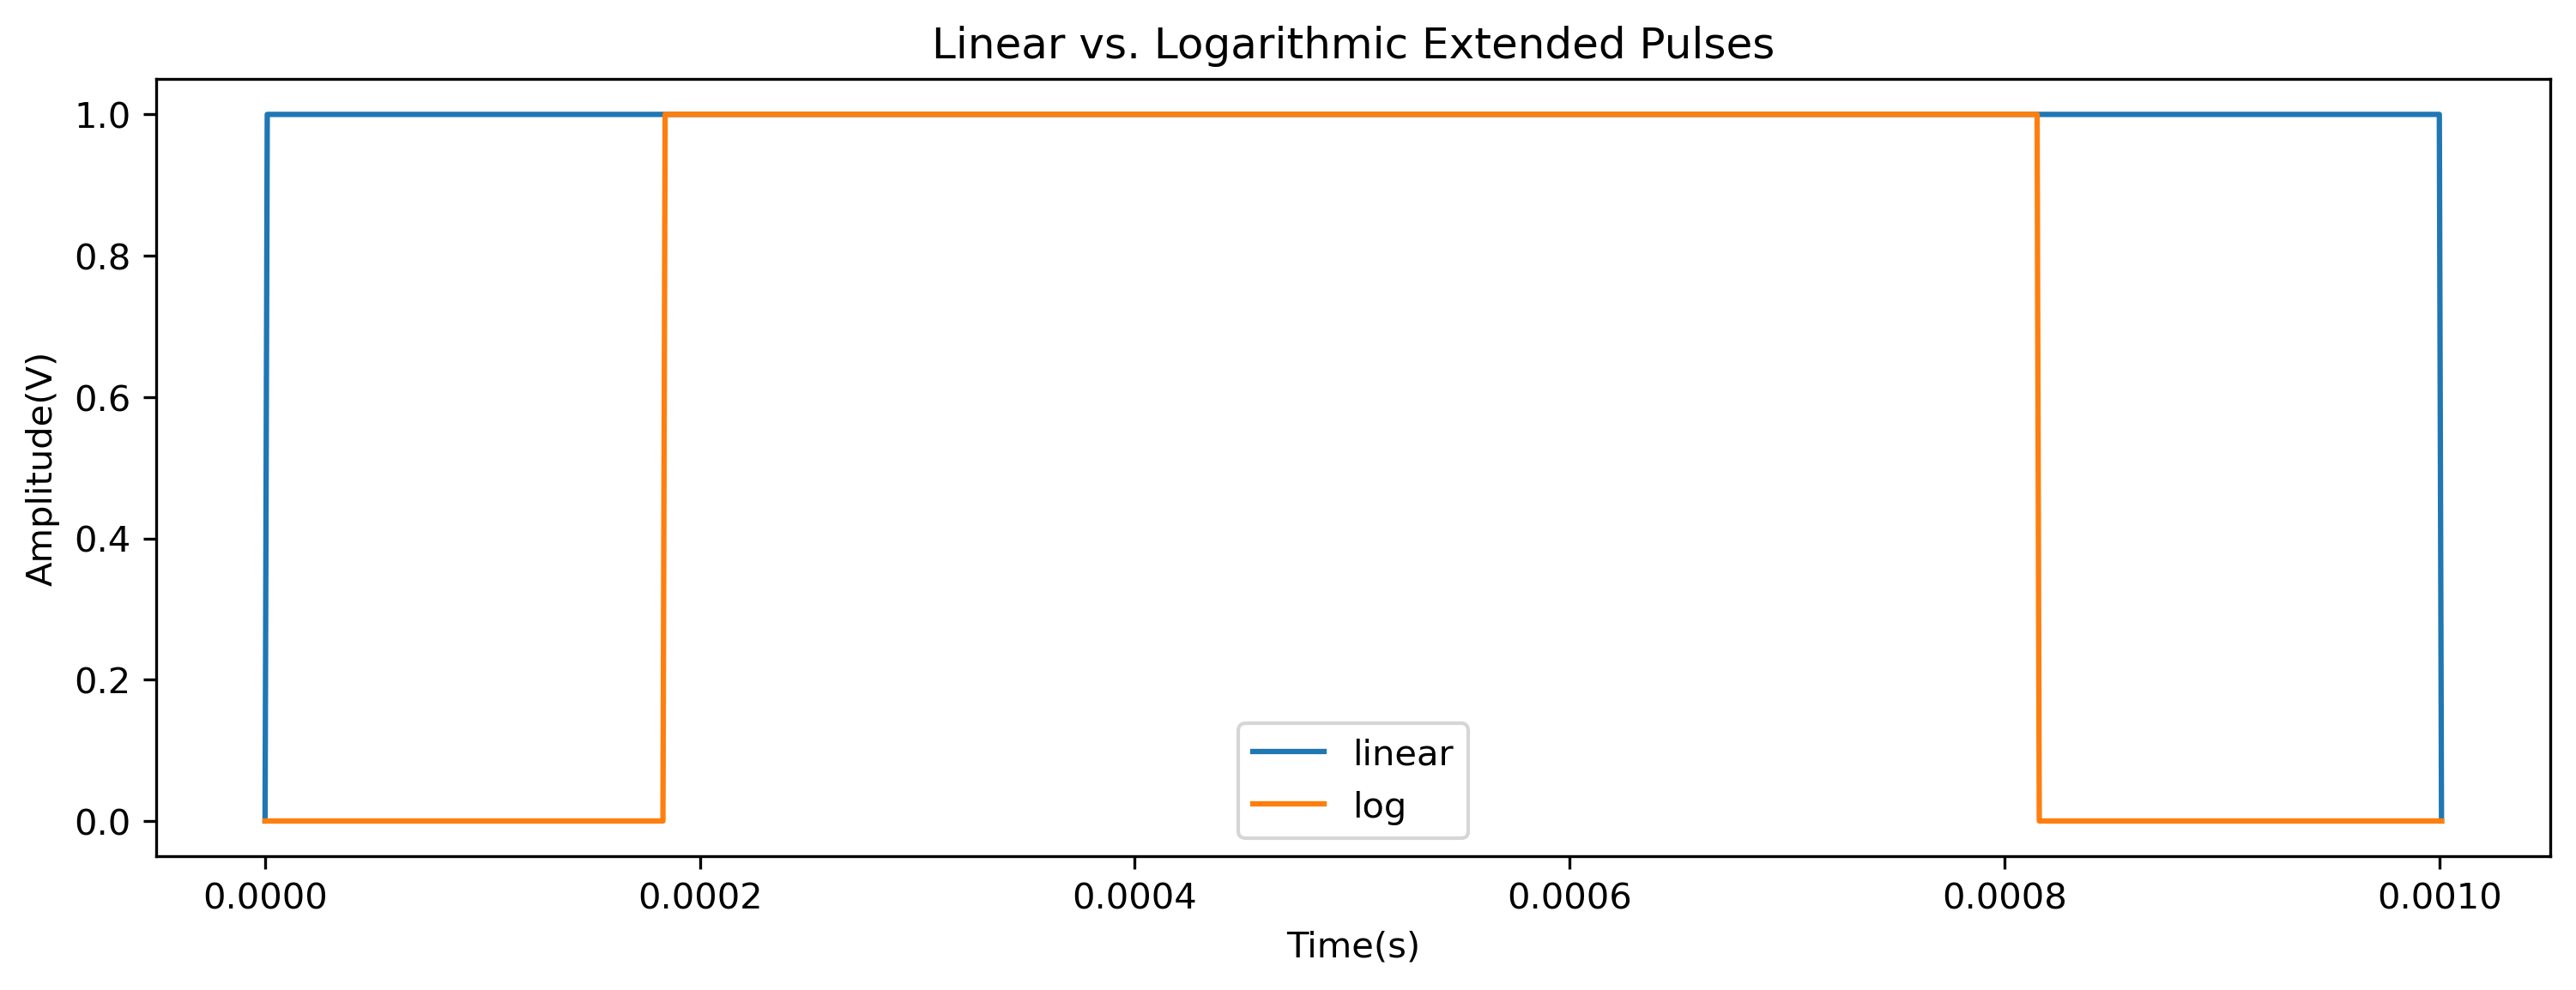

In [10]:
comparison(num_spikes=100)

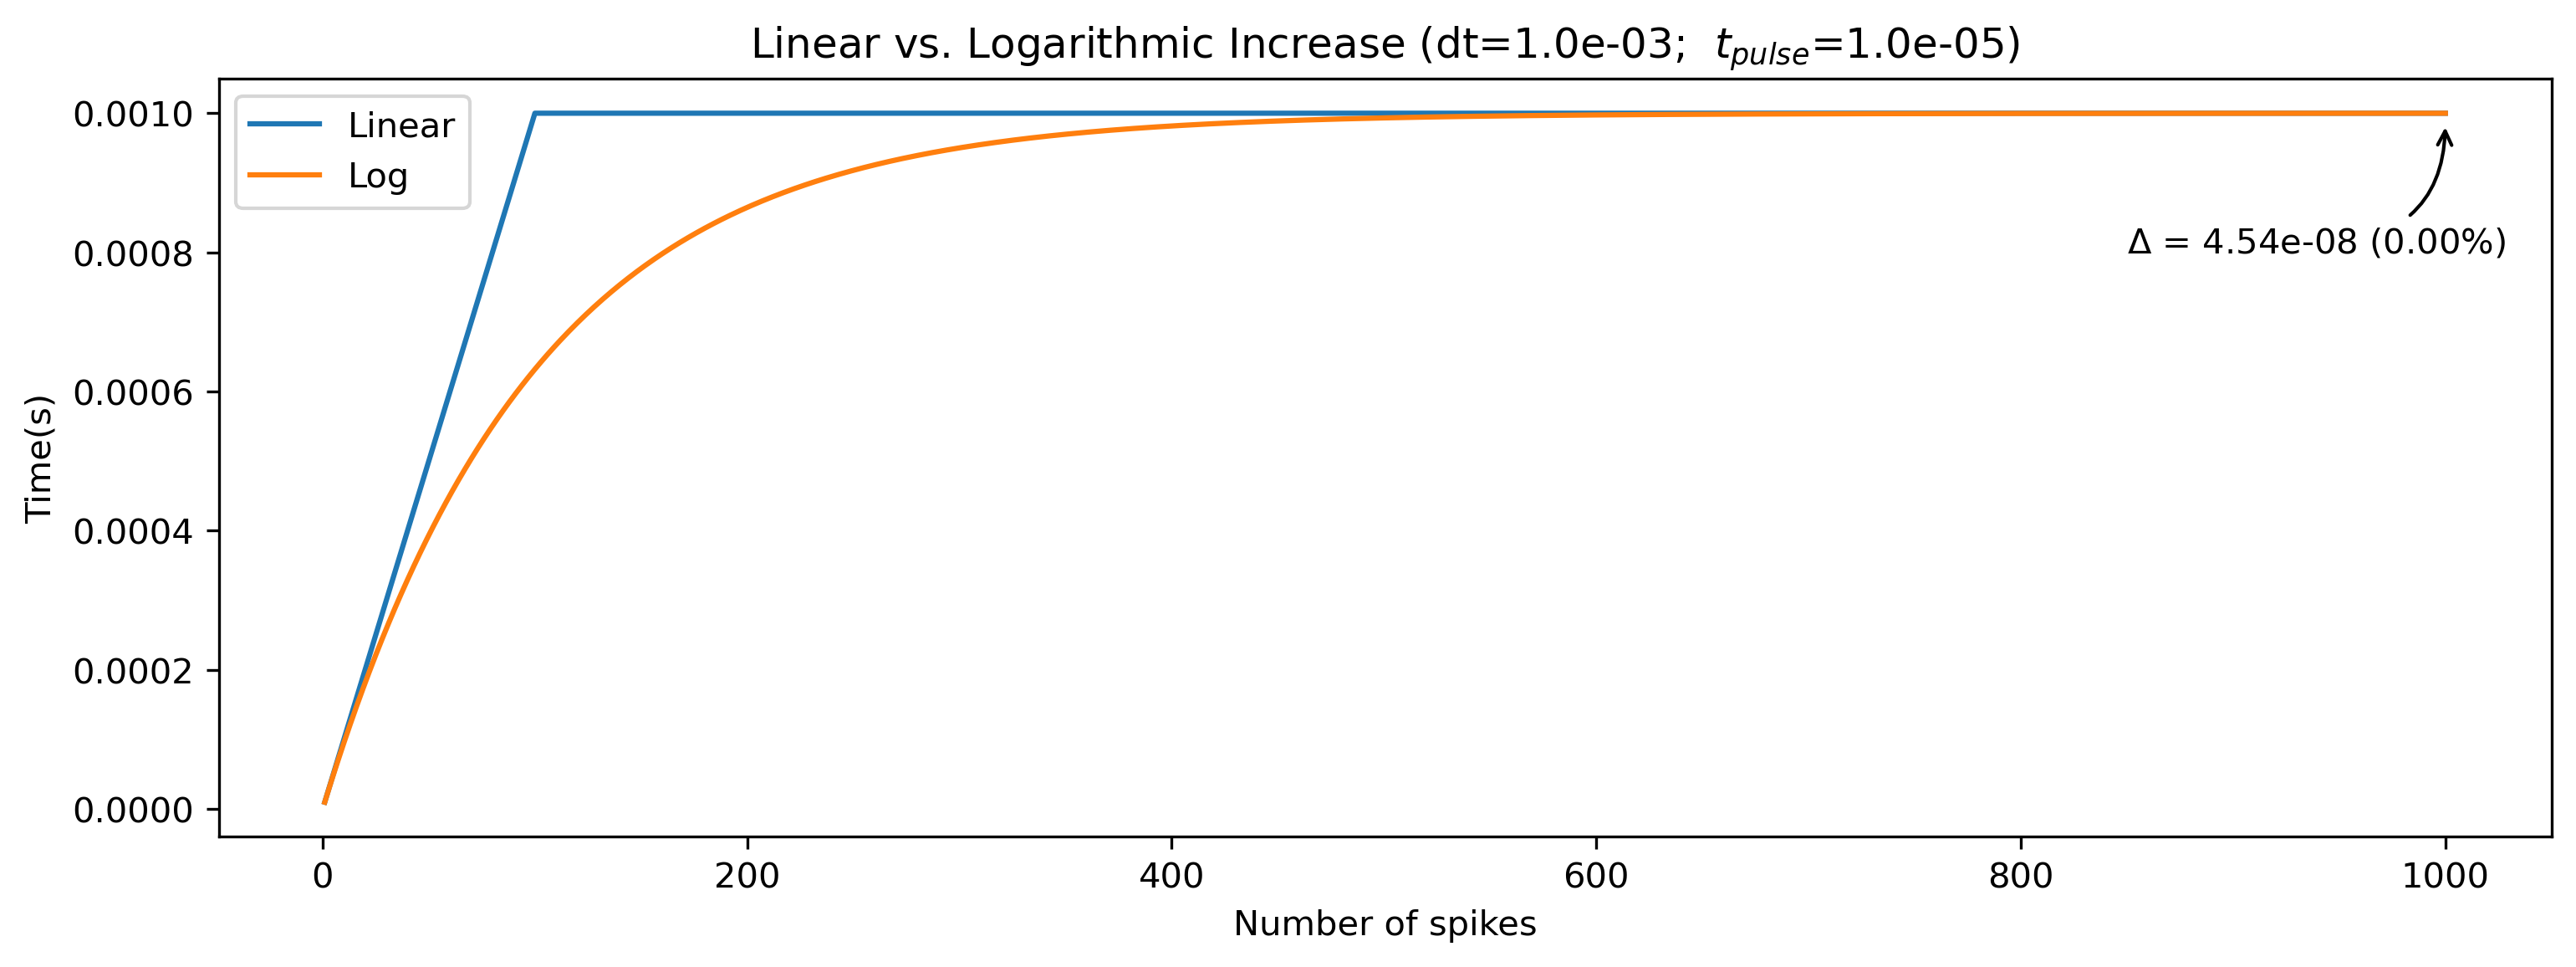

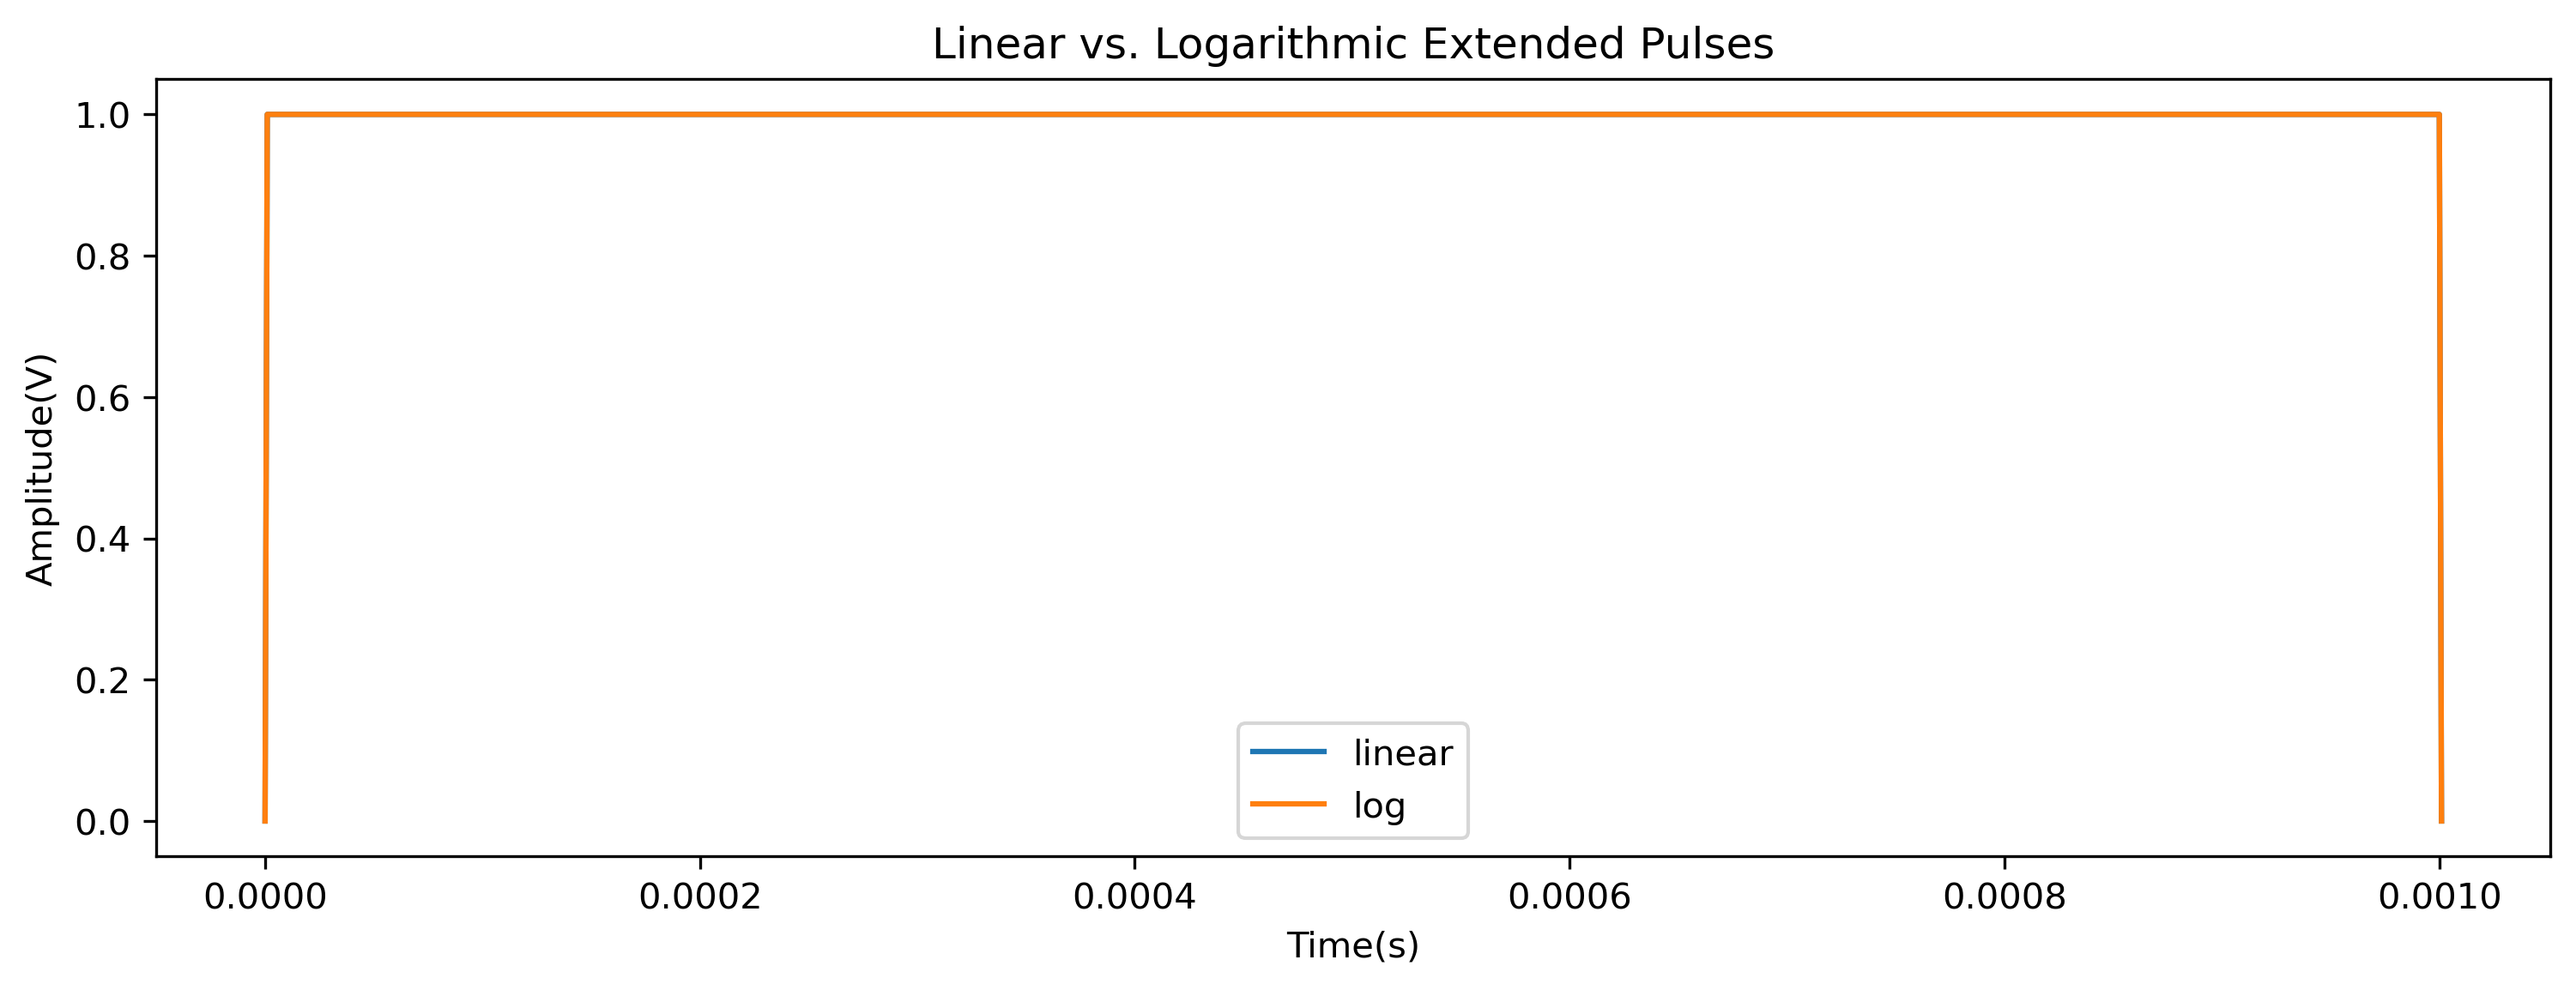

In [11]:
comparison(num_spikes=1000)